In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

#ARIMA
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# import pmdarima as pm
# from pmdarima.model_selection import train_test_split
# import itertools
import warnings
warnings.filterwarnings('ignore') 
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\lynda\OneDrive\Desktop\BiPi\Final_versionML\Data_Externe_Used\Sellers.csv")
df.tail()


,Nom du produit,Prix,Note,Nombre d'avis,URL de l'image,Chemin local de l'image,Lien du produit,Catégorie,À propos de cet article
1335,"EdcX Paracord 4 mm, 35+ Couleurs Unies (10 m, ...","7,79 €",4-5,6 232,https://images-eu.ssl-images-amazon.com/images...,product_images\EdcX_Paracord_4_mm__35__Couleur...,https://www.amazon.fr/EdcX-Paracord-Couleurs-l...,Les meilleures ventes en Sports et Loisirs,🇪🇺 [FABRIQUÉ EN EUROPE] - Tous les produits de...
1336,"Lot de 12 mousquetons,Φ6*60 mm, Mousqueton Cha...","8,99 €",4-5,650,https://images-eu.ssl-images-amazon.com/images...,product_images\Lot_de_12_mousquetons_Φ6_60_mm_...,https://www.amazon.fr/mousquetons-descalade-Mo...,Les meilleures ventes en Sports et Loisirs,"Lot de 12 mousquetons de 60 mm x 6 mm, charge ..."
1337,"SONGMICS Coussin de Protection de Trampoline, ...","38,75 €",4-5,9 145,https://images-eu.ssl-images-amazon.com/images...,product_images\SONGMICS_Coussin_de_Protection_...,https://www.amazon.fr/SONGMICS-Protection-Tram...,Les meilleures ventes en Sports et Loisirs,[Trouvez le bon coussin] Ce coussin de protect...
1338,"Lampe Frontale Rechargeable USB, UNBON Lampe F...","14,99 €",4-5,668,https://images-eu.ssl-images-amazon.com/images...,product_images\Lampe_Frontale_Rechargeable_USB...,https://www.amazon.fr/Rechargeable-UNBON-Puiss...,Les meilleures ventes en Sports et Loisirs,【Super Lumineux avec 5 Modes d’Éclairage】Notre...
1339,"PROF Lot de 3 Boîtes de 240 Allumettes, Longue...","3,99 €",5,5,https://images-eu.ssl-images-amazon.com/images...,product_images\PROF_Lot_de_3_Boîtes_de_240_All...,https://www.amazon.fr/Allumettes-Allume-feu-Co...,Les meilleures ventes en Sports et Loisirs,✅ Lot économique et pratique : 3 boîtes conten...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prix           1340 non-null   float64
 1   Note           1340 non-null   float64
 2   Nombre d'avis  1340 non-null   int32  
 3   Catégorie      1340 non-null   int32  
 4   Cluster        1340 non-null   int32  
 5   cluster_name   1340 non-null   object 
dtypes: float64(2), int32(3), object(1)
memory usage: 47.2+ KB


In [3]:
df["Nombre d'avis"] = df["Nombre d'avis"].astype(str).str.replace(r"[^\d]", "", regex=True).astype(int)

In [13]:
def convertir_note(note):
    if "-" in str(note):
        debut, fin = map(float, note.split("-"))
        return (debut + fin) / 2
    else:
        return float(note)

# Appliquer la conversion à la colonne 'Note'
df["Note"] = df["Note"].apply(convertir_note)

# Calcul de la moyenne globale des notes
moyenne_notes = df["Note"].mean()

print(f"Moyenne des notes : {moyenne_notes:.2f}")

Moyenne des notes : 4.45


In [5]:
colonnes = [ "Prix", "Note","Nombre d'avis","Catégorie"]
df = df[colonnes]

In [6]:
import pandas as pd
import re

def extraire_partie_util(df, nom_colonne):
    if nom_colonne not in df.columns:
        raise ValueError(f"La colonne '{nom_colonne}' n'existe pas dans le DataFrame.")

    # Normalisation en minuscules et extraction du pattern
    pattern = r"les meilleures ventes en\s*(.*)"
    df['Catégorie'] = df[nom_colonne].fillna('').str.lower().str.extract(pattern, expand=False).str.strip()
    return df
df = extraire_partie_util(df, 'Catégorie')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prix           1340 non-null   object 
 1   Note           1340 non-null   float64
 2   Nombre d'avis  1340 non-null   int32  
 3   Catégorie      1340 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 36.8+ KB


In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Catégorie"] = label_encoder.fit_transform(df["Catégorie"])
nb_distincts = df['Catégorie'].nunique()
print("Nombre de valeurs distinctes :", nb_distincts)

Nombre de valeurs distinctes : 27


In [9]:
df.head()

,Prix,Note,Nombre d'avis,Catégorie
0,"559,00 €",4.0,746,0
1,"539,00 €",4.0,3797,0
2,"289,01 €",4.0,11531,0
3,"429,00 €",3.0,731,0
4,"248,00 €",4.0,6804,0


In [10]:
import re

# Nettoyage robuste du prix avec regex
df["Prix"] = df["Prix"].astype(str).replace(
    to_replace=r"[^\d,\.]",  # garde uniquement chiffres, virgule, point
    value="",
    regex=True
).str.replace(",", ".", regex=False)
# Remove spaces before type casting using str.replace
df["Prix"] = df["Prix"].str.replace(" ", "", regex=False).astype(float)

In [11]:
df.head()

,Prix,Note,Nombre d'avis,Catégorie
0,559.00,4.0,746,0
1,539.00,4.0,3797,0
2,289.01,4.0,11531,0
3,429.00,3.0,731,0
4,248.00,4.0,6804,0


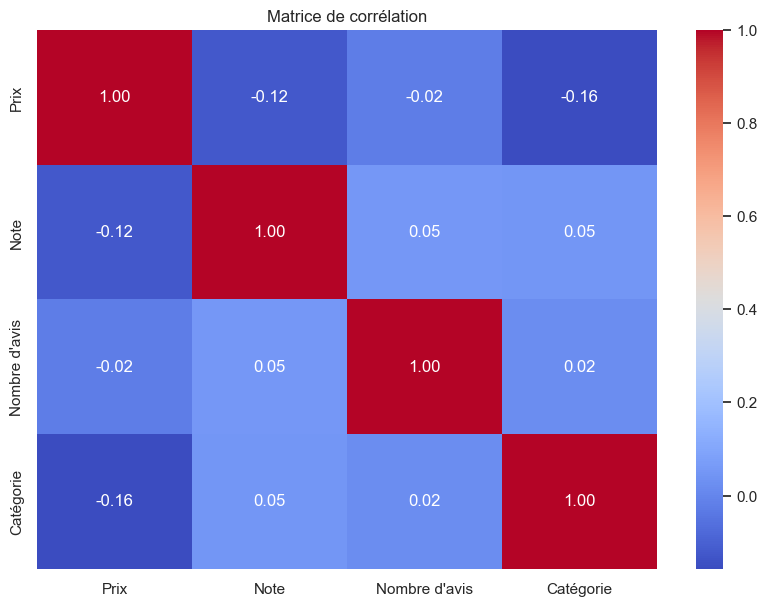

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

colonnes = ["Prix", "Note","Nombre d'avis","Catégorie"]
df = df[colonnes]
matrice_corr = df.corr()

# Affichage avec Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Filtrage des colonnes pertinentes
df_clustering = df[["Nombre d'avis", "Note","Prix"]].copy()

df_clustering['Prix'] = (df['Prix'] - df['Prix'].min()) / (df['Prix'].max() - df['Prix'].min())

# Normalisation des données
scaler = StandardScaler()
df_clustering[["Nombre d'avis", "Note"]] = scaler.fit_transform(df_clustering[["Nombre d'avis", "Note"]])

kmeans = KMeans(n_clusters=
                4, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering[["Nombre d'avis", "Note","Prix"]])

df["Cluster"] = df_clustering["Cluster"]


  File "C:\Users\lynda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

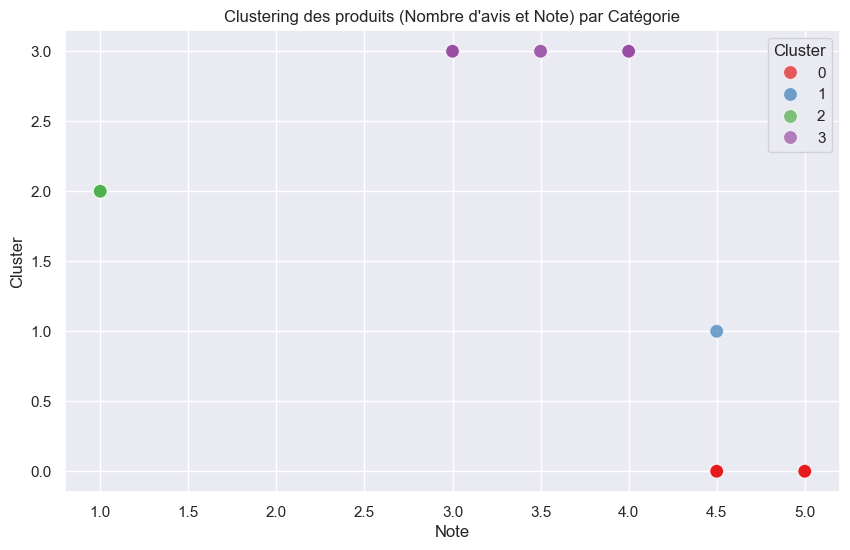

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation du clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Note", y="Cluster", hue="Cluster", data=df, palette="Set1", s=100, alpha=0.7)

plt.title("Clustering des produits (Nombre d'avis et Note) par Catégorie")
plt.xlabel("Note")
plt.legend(title="Cluster")
plt.show()

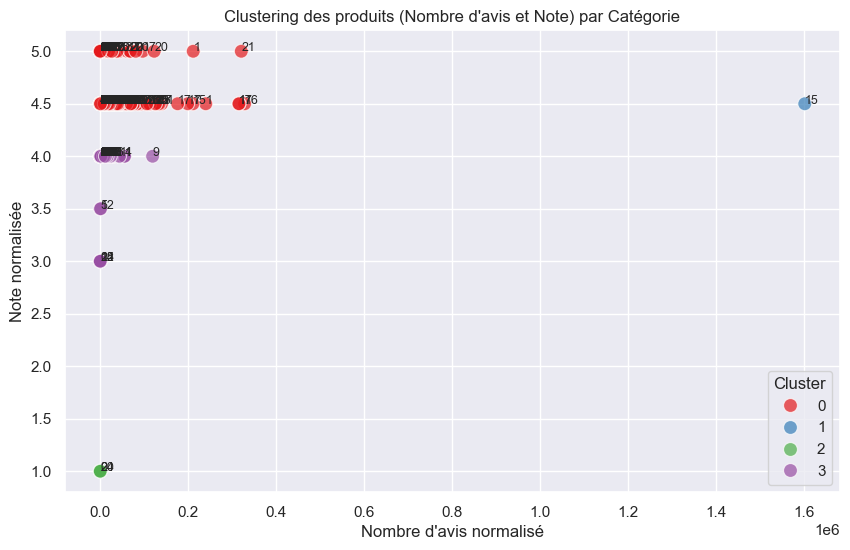

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Nombre d'avis", y="Note", hue="Cluster", data=df, palette="Set1", s=100, alpha=0.7)


for i in range(df.shape[0]):
    plt.text(df["Nombre d'avis"].iloc[i], df["Note"].iloc[i], df["Catégorie"].iloc[i], fontsize=9)

plt.title("Clustering des produits (Nombre d'avis et Note) par Catégorie")
plt.xlabel("Nombre d'avis normalisé")
plt.ylabel("Note normalisée")
plt.legend(title="Cluster")
plt.show()


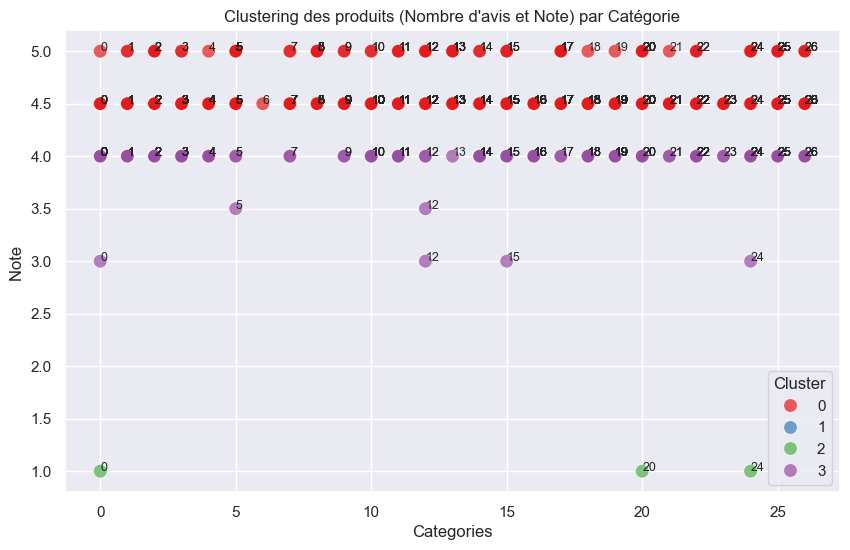

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(x="Catégorie", y="Note", hue="Cluster", data=df, palette="Set1", s=100, alpha=0.7)


for i in range(df.shape[0]):
    plt.text(df["Catégorie"].iloc[i], df["Note"].iloc[i], df["Catégorie"].iloc[i], fontsize=9)

plt.title("Clustering des produits (Nombre d'avis et Note) par Catégorie")
plt.xlabel("Categories")
plt.ylabel("Note ")
plt.legend(title="Cluster")
plt.show()

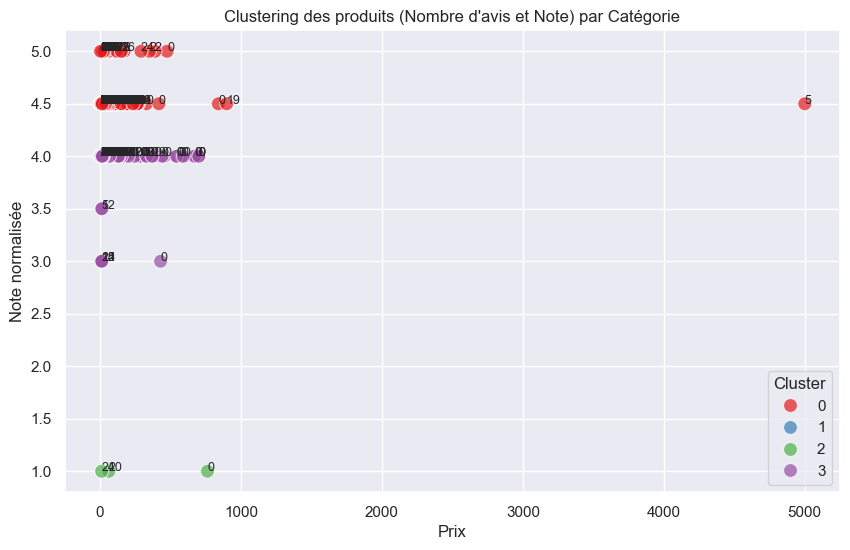

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation du clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Prix", y="Note", hue="Cluster", data=df, palette="Set1", s=100, alpha=0.7)

# Ajout des catégories sur le graphique
for i in range(df.shape[0]):
    plt.text(df["Prix"].iloc[i], df["Note"].iloc[i], df["Catégorie"].iloc[i], fontsize=9)

plt.title("Clustering des produits (Nombre d'avis et Note) par Catégorie")
plt.xlabel("Prix")
plt.ylabel("Note normalisée")
plt.legend(title="Cluster")
plt.show()

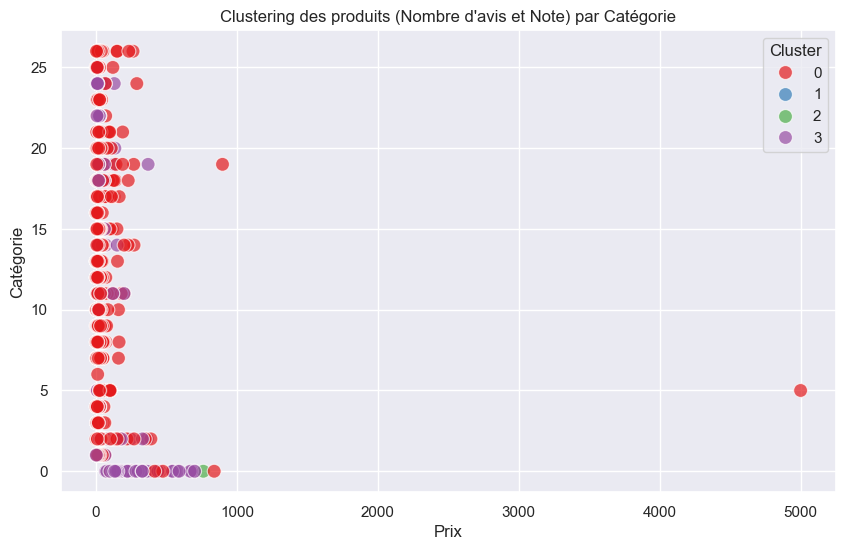

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation du clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Prix", y="Catégorie", hue="Cluster", data=df, palette="Set1", s=100, alpha=0.7)

plt.title("Clustering des produits (Nombre d'avis et Note) par Catégorie")
plt.xlabel("Prix")
plt.ylabel("Catégorie")
plt.legend(title="Cluster")
plt.show()

In [20]:
def rename_clusters(cluster_label):
    if cluster_label in [0, 1]:
        return 'Top Produits'
    elif cluster_label == 3:
        return 'Produits Avec bonne reputation'
    elif cluster_label == 2:
        return 'Produits Faible Qualité'
    else:
        return 'Inconnu'

# Si tu as un DataFrame pandas avec une colonne "cluster"
df['cluster_name'] = df['Cluster'].apply(rename_clusters)


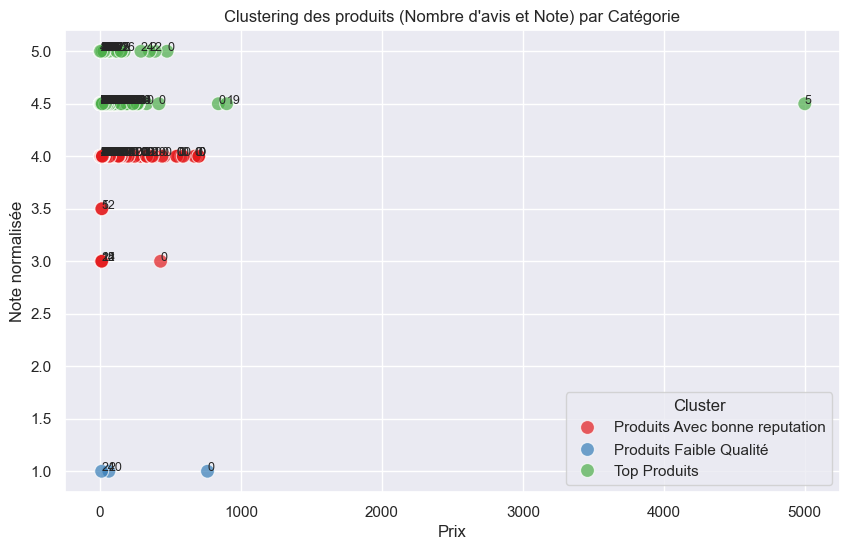

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation du clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Prix", y="Note", hue="cluster_name", data=df, palette="Set1", s=100, alpha=0.7)

# Ajout des catégories sur le graphique
for i in range(df.shape[0]):
    plt.text(df["Prix"].iloc[i], df["Note"].iloc[i], df["Catégorie"].iloc[i], fontsize=9)

plt.title("Clustering des produits (Nombre d'avis et Note) par Catégorie")
plt.xlabel("Prix")
plt.ylabel("Note normalisée")
plt.legend(title="Cluster")
plt.show()

In [22]:
df.head()

,Prix,Note,Nombre d'avis,Catégorie,Cluster,cluster_name
0,559.00,4.0,746,0,3,Produits Avec bonne reputation
1,539.00,4.0,3797,0,3,Produits Avec bonne reputation
2,289.01,4.0,11531,0,3,Produits Avec bonne reputation
3,429.00,3.0,731,0,3,Produits Avec bonne reputation
4,248.00,4.0,6804,0,3,Produits Avec bonne reputation


In [23]:
from joblib import dump

dump(model, 'modele_clustering.joblib')


NameError: name 'model' is not defined